In [11]:
import os
import sys
import logging
import itertools
from imp import reload
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
sys.path.append('/home/wtb2/Documents/EBTEL_C/bin/')
import ebtel_dem as ebd
import ebtel_plot as ebp
import ebtel_plot_em as ebpe
reload(ebpe)
reload(ebd)
reload(ebp)
%matplotlib inline

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Preview some ion heating profiles

In [40]:
plotter = ebp.Plotter(lvl0_filename='/data/datadrive2/EBTEL_runs/ion_heating_runs/alphauniform/data/ebtel_L40.0_tn5000_tpulse200.0_rka4/ebtel_L40.0_tn5000_tpulse200.0_rka4_0',
                 two_fluid=True)

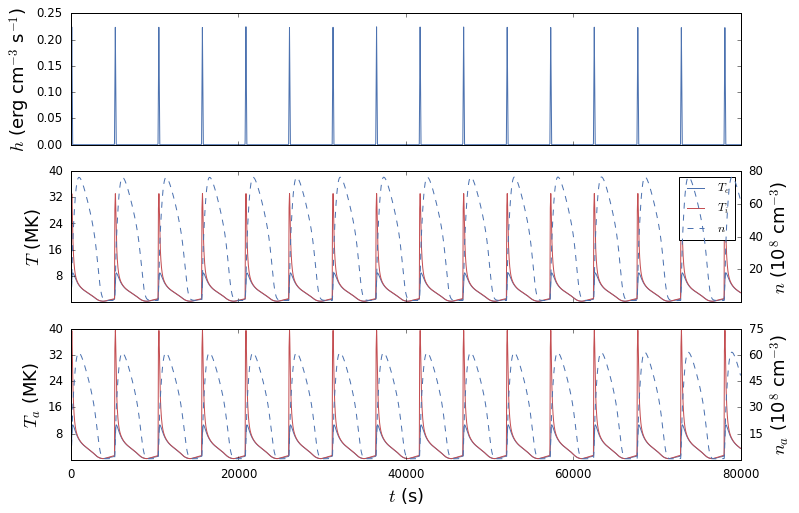

In [41]:
plotter.plot_params()

In [33]:
process_test = ebd.DEMProcess('/data/datadrive2/EBTEL_runs/','single',2.5,40.0,200.0,'rka4',aspect_ratio_factor=10.0,
                             em_peak_falloff=0.7)

In [34]:
process_test.logger.setLevel(logging.INFO)
FORMAT = "[%(filename)s:%(lineno)s - %(funcName)20s() ] %(message)s"
logging.basicConfig(format=FORMAT)

In [35]:
Tn = np.arange(250,5250,250)
#process_test.import_raw(Tn,save_to_file='/home/wtb2/Documents/research_notebook/EBTEL/test_em.pickle')
process_test.import_from_file('/data/datadrive2/EBTEL_figs/single_heating_runs/alpha2.5/ebtel_L40.0_tpulse200.0_alpha2.5-b1.0_single_heating.lvl1_em.pickle')

In [36]:
process_test.calc_stats()

In [37]:
process_test.fit_em(cool_limits=[10**6.,10**6.5])

In [40]:
process_test.calc_fit_stats()

In [41]:
em_plotter = ebpe.DEMPlotter(process_test.em,process_test.em_stats,process_test.fits,process_test.fits_stats,
                            fontsize=22.,alfs=0.65)

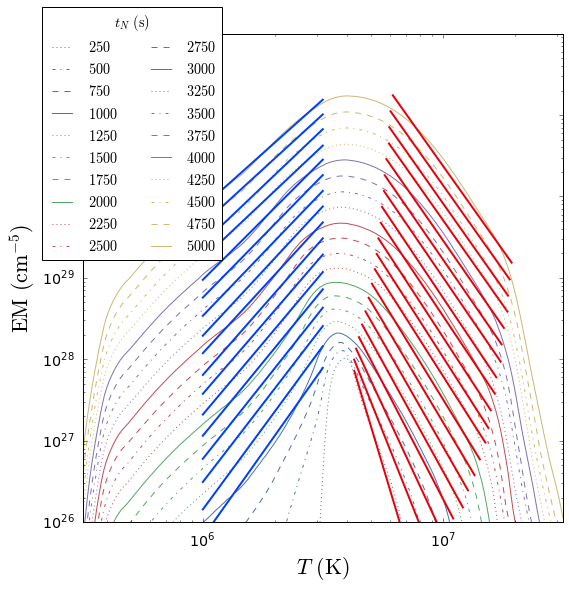

In [42]:
em_plotter.plot_em_curves()

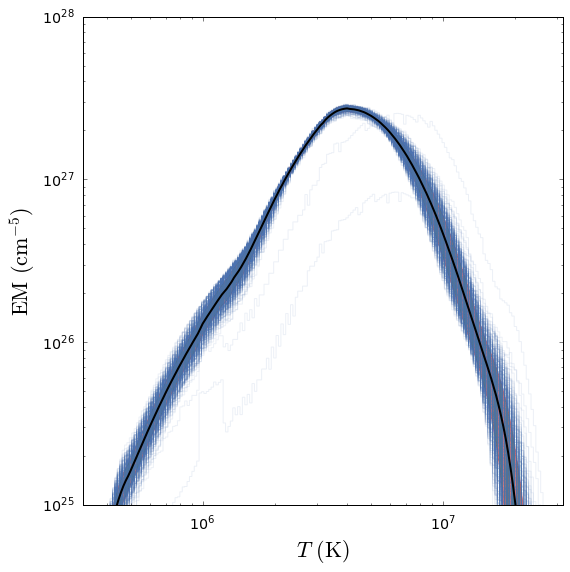

In [43]:
em_plotter.plot_em_curve(5000)

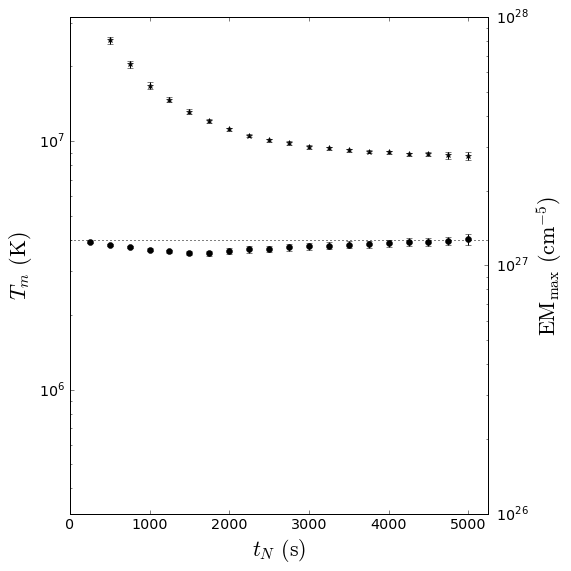

In [44]:
em_plotter.plot_em_max(y_limits_t=[10**5.5,10**7.5])

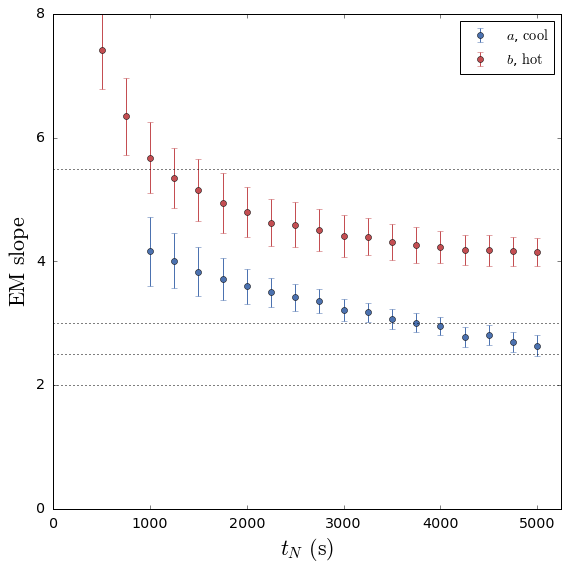

In [45]:
em_plotter.plot_em_slopes()

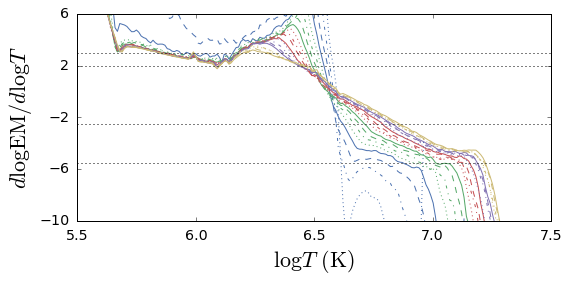

In [46]:
em_plotter.figsize = (8,4)
em_plotter.plot_em_derivs()

In [19]:
t,em = process_test.em_binned[-3][0]['bin_centers'],process_test.em_binned[-1][0]['hist']

In [20]:
tcool,emcool = t[t<t[np.argmax(em)]],em[t<t[np.argmax(em)]]
thot,emhot = t[t>=t[np.argmax(em)]],em[t>=t[np.argmax(em)]]

In [27]:
from scipy.interpolate import interp1d

In [28]:
def fit_lims(t,em):
    f = interp1d(t[em>1e+25],em[em>1e+25])
    x = np.linspace(t[em>1e+25][0],t[em>1e+25][-1],10)
    dEmdT_mp = np.gradient(f(x),np.gradient(x),edge_order=2)[int(len(x)/2)]
    hc_var = int(dEmdT_mp/np.fabs(dEmdT_mp))
    print(hc_var)
    indices = np.where(em < 1e+25)[0]
    t2 = t[indices[-int((hc_var+1)/2)]+hc_var]
    indices = np.where(em<0.7*np.max(em))[0]
    t1 = t[indices[-int((hc_var+1)/2)]]
    
    return sorted([t1,t2])

In [29]:
test = fit_lims(thot,emhot)
print(np.array(test)/1e+6)

-1
[  5.90455319  22.51535499]


In [31]:
i = 0
for d in process_test.em_binned[-3]:
    print('Entry %d'%i)
    t,em = d['bin_centers'],d['hist']
    thot,emhot = t[t>=t[np.argmax(em)]],em[t>=t[np.argmax(em)]]
    test = fit_lims(thot,emhot)
    print(np.array(test)/1e+6)
    i += 1

Entry 0
-1
[  5.90455319  21.0093194 ]
Entry 1
-1
[  6.18346038  20.53003604]
Entry 2
-1
[  5.90455319  21.0093194 ]
Entry 3
-1
[  6.18346038  19.15679698]
Entry 4
-1
[  5.76985325  19.60402142]
Entry 5
-1
[  5.76985325  17.87541287]
Entry 6
-1
[  5.63822621  17.87541287]
Entry 7
-1
[  6.32781618  17.46762299]
Entry 8
-1
[  5.76985325  17.87541287]
Entry 9
-1
[  6.47554202  20.06168653]
Entry 10
-1
[  5.76985325  18.71977502]
Entry 11
-1
[  6.18346038  22.00171461]
Entry 12
-1
[  6.04239776  21.0093194 ]
Entry 13
-1
[  5.90455319  20.06168653]
Entry 14
-1
[  6.04239776  18.2927228 ]
Entry 15
-1
[  6.18346038  20.06168653]
Entry 16
-1
[  5.76985325  17.46762299]
Entry 17
-1
[  5.63822621  17.06913598]
Entry 18
-1
[  6.04239776  20.53003604]
Entry 19
-1
[  5.76985325  17.87541287]
Entry 20
-1
[  5.76985325  18.71977502]
Entry 21
-1
[  5.90455319  19.15679698]
Entry 22
-1
[  5.90455319  18.71977502]
Entry 23
-1
[  5.90455319  19.15679698]
Entry 24
-1
[  6.32781618  18.71977502]
Entry 25
-